In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
x = [1,2,3,4,5,6,7]
y = [2,4,6,8,10,12,14]

In [8]:
y2=[2*item for item in y]

Text(0, 0.5, 'sales')

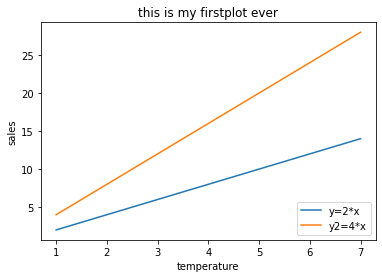

In [13]:
fig=plt.figure()
plt.plot(x,y,label='y=2*x')
plt.plot(x,y2,label='y2=4*x')
plt.legend(loc='lower right')
plt.title('this is my firstplot ever')
plt.xlabel('temperature')
plt.ylabel('sales')

In [14]:
fig.savefig('this is my first fig')

Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.api as sm
import statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox
pd.options.display.max_rows = 300
import pandas as pd
df = pd.read_csv("data/Data_Marketing_Customer_Analysis_Round3.csv")

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10602 entries, 0 to 10601
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10602 non-null  object
 1   customer_lifetime_value        10602 non-null  int64 
 2   response                       10602 non-null  object
 3   coverage                       10602 non-null  object
 4   education                      10602 non-null  object
 5   effective_to_date              10602 non-null  object
 6   employment_status              10602 non-null  object
 7   gender                         10602 non-null  object
 8   income                         10602 non-null  int64 
 9   location_code                  10602 non-null  object
 10  marital_status                 10602 non-null  object
 11  monthly_premium_auto           10602 non-null  int64 
 12  months_since_last_claim        10602 non-null  int64 
 13  m

In [31]:
df._get_numeric_data()
num_cols = df._get_numeric_data().columns

catCols = [col for col in df.columns if df[col].dtype=="O"

In [54]:
x = [col for col in df.columns if df[col].dtype=="O"]
df[x]

,region,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,arizona,no,basic,college,2/18/11,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,california,no,basic,college,1/18/11,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,washington,no,basic,bachelor,2/10/11,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,oregon,yes,extended,college,1/11/11,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,oregon,no,premium,bachelor,1/17/11,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10597,nevada,no,premium,bachelor,1/19/11,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10598,oregon,no,basic,college,1/6/11,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10599,arizona,no,extended,bachelor,2/6/11,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10600,california,no,premium,college,2/13/11,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [58]:
df._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,61311,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,25,31,0,7,707
...,...,...,...,...,...,...,...,...
10597,15563,38966,253,19,40,0,7,1214
10598,5259,61146,65,7,68,0,6,273
10599,23893,39837,201,11,63,0,2,381
10600,11971,64195,158,0,27,4,6,618


In [34]:
np.number
np.object_

numpy.object_

check the normality of the numerical variables visually

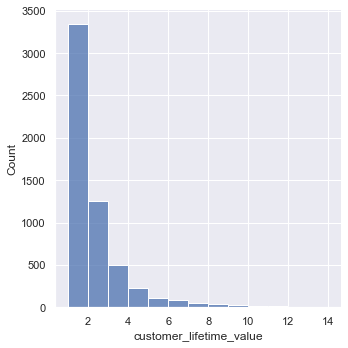

In [69]:
cust_lf = df['customer_lifetime_value'].value_counts()
sns.displot(cust_lf, binwidth = 1)
plt.show()

/Users/sunitachand/opt/miniconda3/envs/DA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='Density'>

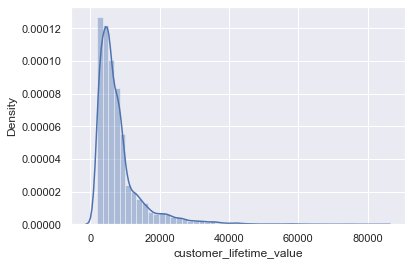

In [71]:
plt.figure()
sns.distplot(df["customer_lifetime_value"])

/Users/sunitachand/opt/miniconda3/envs/DA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

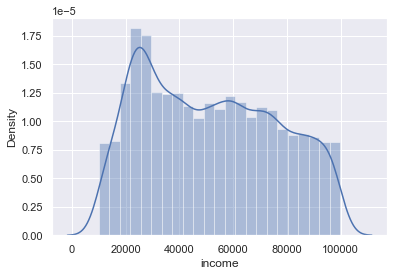

In [72]:
plt.figure()
sns.distplot(df["income"])

/Users/sunitachand/opt/miniconda3/envs/DA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

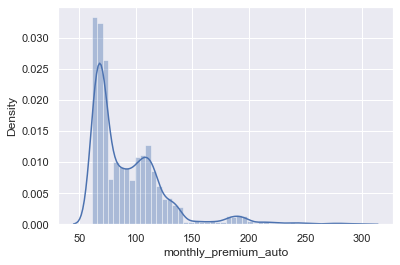

In [73]:
plt.figure()
sns.distplot(df["monthly_premium_auto"])

/Users/sunitachand/opt/miniconda3/envs/DA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='months_since_last_claim', ylabel='Density'>

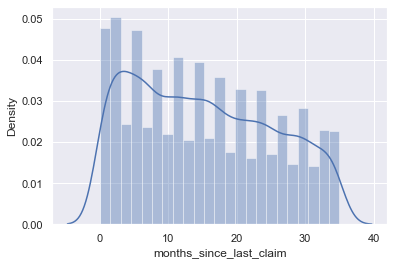

In [74]:
plt.figure()
sns.distplot(df["months_since_last_claim"])

/Users/sunitachand/opt/miniconda3/envs/DA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='months_since_policy_inception', ylabel='Density'>

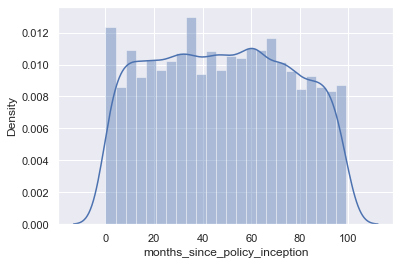

In [75]:
plt.figure()
sns.distplot(df["months_since_policy_inception"])

In [ ]:
plt.figure()
sns.distplot(df["monthly_premium_auto"])

/Users/sunitachand/opt/miniconda3/envs/DA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_open_complaints', ylabel='Density'>

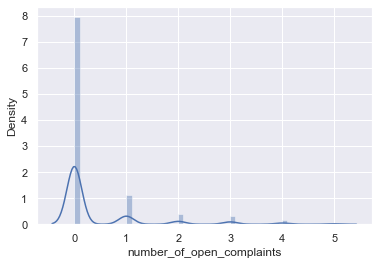

In [76]:
plt.figure()
sns.distplot(df["number_of_open_complaints"])

/Users/sunitachand/opt/miniconda3/envs/DA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_policies', ylabel='Density'>

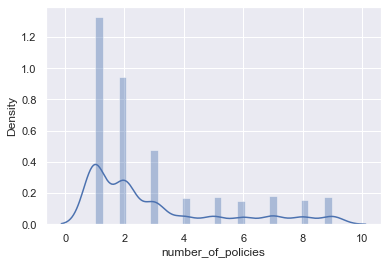

In [77]:
plt.figure()
sns.distplot(df["number_of_policies"])

/Users/sunitachand/opt/miniconda3/envs/DA/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

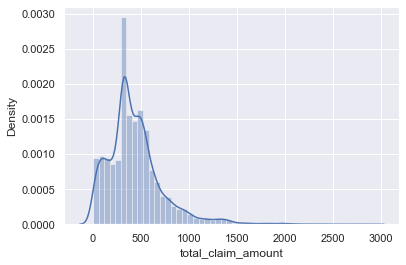

In [80]:
plt.figure()
sns.distplot(df["total_claim_amount"])

Text(0.5, 1.0, 'Total claim')

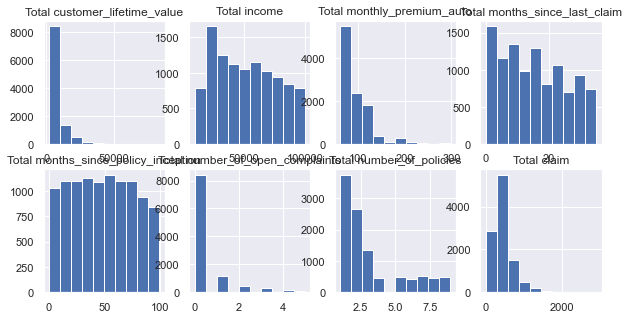

In [92]:
fig, ax = plt.subplots(1,8, figsize=(10,5))
plt.subplot(2,4,1)
plt.hist(df["customer_lifetime_value"])
plt.title("Total customer_lifetime_value")

plt.subplot(2,4,2)
plt.hist(df["income"])
plt.title("Total income")

plt.subplot(2,4,3)
plt.hist(df["monthly_premium_auto"])
plt.title("Total monthly_premium_auto")

plt.subplot(2,4,4)
plt.hist(df["months_since_last_claim"])
plt.title("Total months_since_last_claim")

plt.subplot(2,4,5)
plt.hist(df["months_since_policy_inception"])
plt.title("Total months_since_policy_inception")

plt.subplot(2,4,6)
plt.hist(df["number_of_open_complaints"])
plt.title("Total number_of_open_complaints")

plt.subplot(2,4,7)
plt.hist(df["number_of_policies"])
plt.title("Total number_of_policies")

plt.subplot(2,4,8)
plt.hist(df["total_claim_amount"])
plt.title("Total claim")
